In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
df=pd.read_csv("AIML Dataset.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [8]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.shape

(6362620, 11)

In [13]:
df['isFraud'].value_counts(normalize=True)*100 #here data is imabalance we will use smote or other technique to balance the data.

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

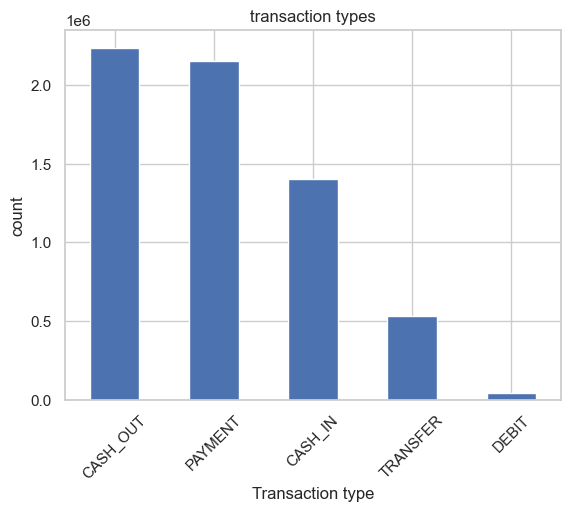

In [14]:
df['type'].value_counts().plot(kind='bar',title='transaction types')
plt.xlabel("Transaction type")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

In [15]:
df['type'].value_counts().dtype

dtype('int64')

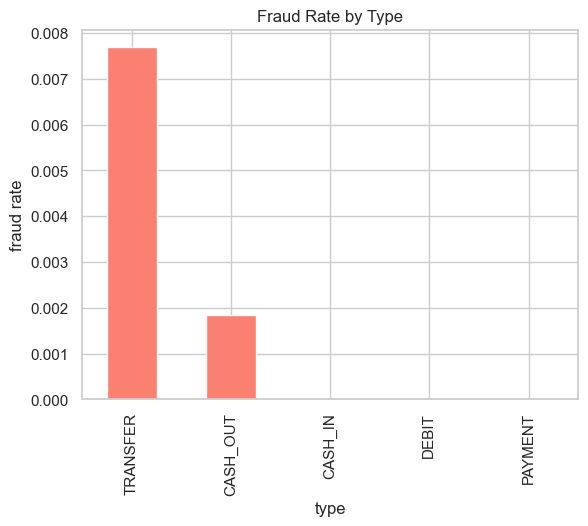

In [16]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color='Salmon')
plt.ylabel("fraud rate")
plt.xlabel("type")
plt.show()

In [17]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

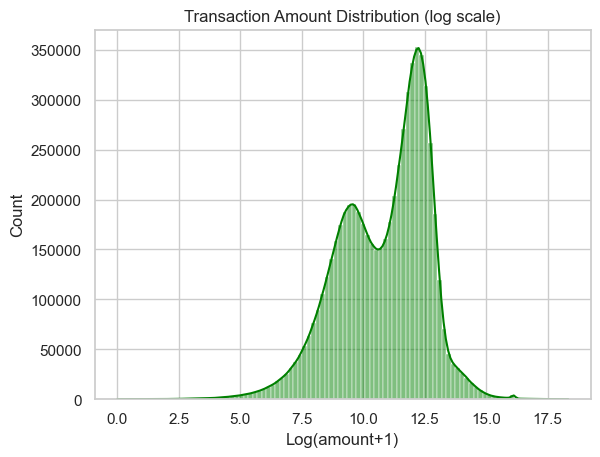

In [18]:
# to compress large values
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(amount+1)")
plt.show()

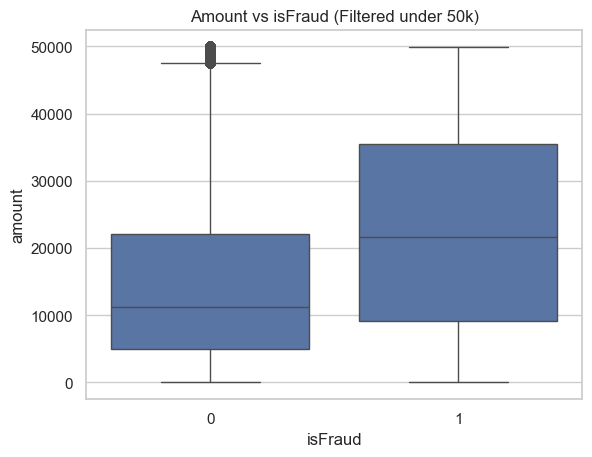

In [19]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df['balancediffori']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balancediffdest']=df['newbalanceDest']-df['oldbalanceDest']
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancediffori,balancediffdest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [23]:
(df['balancediffori']<0).sum().astype(int)

np.int64(1399253)

In [24]:
(df['balancediffdest']<0).sum().astype(int)

np.int64(1238864)

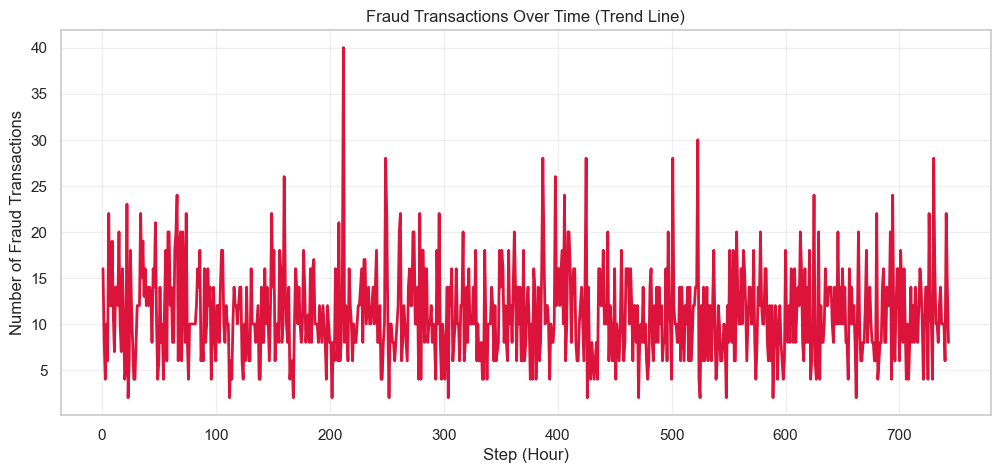

In [ ]:
plt.figure(figsize=(12,5))

# Count number of frauds per step
fraud_per_step = df[df['isFraud']==1]['step'].value_counts().sort_index()

# Plot as a line
#how many fraud happends in each hour
plt.plot(fraud_per_step.index, fraud_per_step.values, color='crimson', linewidth=2)
plt.title("Fraud Transactions Over Time (Trend Line)")
plt.xlabel("Step (Hour)")
plt.ylabel("Number of Fraud Transactions")
plt.grid(alpha=0.3)
plt.show()
#not useful



In [30]:
df['hour'] = df['step'] % 24

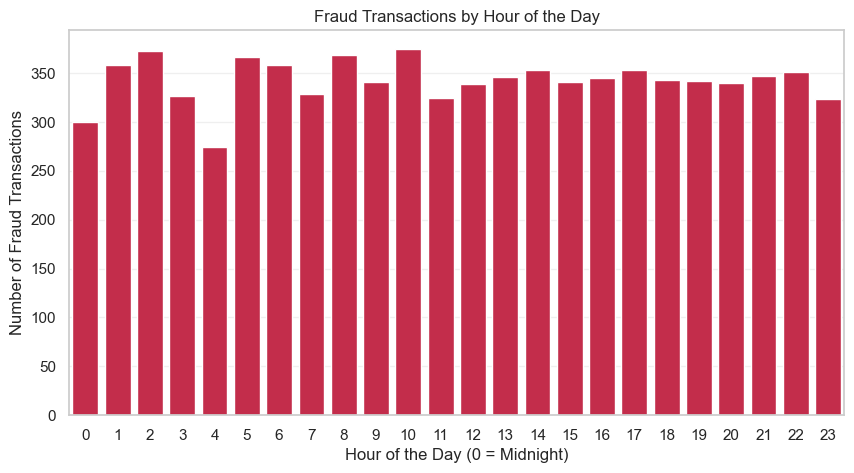

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df[df['isFraud']==1], color='crimson')
plt.title("Fraud Transactions by Hour of the Day")
plt.xlabel("Hour of the Day (0 = Midnight)")
plt.ylabel("Number of Fraud Transactions")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [34]:
df.drop('step', axis=1, inplace=True)


In [35]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancediffori,balancediffdest,hour
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1
744,PAYMENT,9805.46,C480184864,0.0,0.00,M1433956626,0.0,0.0,0,0,0.00,0.0,1


In [39]:
top_senders =df["nameOrig"].value_counts().head(10)
print(top_senders)


nameOrig
C1784010646    3
C400299098     3
C724452879     3
C1530544995    3
C1677795071    3
C1976208114    3
C1065307291    3
C545315117     3
C1902386530    3
C2051359467    3
Name: count, dtype: int64


In [40]:
top_receivers=df["nameDest"].value_counts().head(10)
top_receivers

nameDest
C1286084959    106
C665576141     100
C248609774      97
C2083562754     94
C97730845       94
C977993101      94
C985934102      92
C1899073220     91
C1789550256     90
C1360767589     90
Name: count, dtype: int64

In [42]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1334405552    1
C467632528     1
C1364127192    1
C1635772897    1
C669700766     1
C1275464847    1
C13692003      1
C1872047468    1
C1499825229    1
Name: count, dtype: int64

In [45]:
fraud_types1= df[(df['type'].isin(["TRANSFER", "CASH_OUT"]))]
fraud_types1['type'].value_counts()

type
CASH_OUT    2237350
TRANSFER     532836
Name: count, dtype: int64

In [46]:
fraud_types = df[(df['type'].isin(["TRANSFER", "CASH_OUT"])) & (df['isFraud'] == 1)]
fraud_types['type'].value_counts()


type
CASH_OUT    4112
TRANSFER    4094
Name: count, dtype: int64